In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords

In [76]:
titles = ['1984', 'animal', 'brave', 'cats', 'doandriods', 'gather', 'scanner', 'sh5']

In [66]:
file = open('C:\\Users\\justf\\Desktop\\txtfiles\\1984.txt')

In [58]:
def cleaner(text):
    pattern = "[\[].*?[\]]"
    text = re.sub(pattern, '', text)
    text = ' '.join(text.split())
    text = re.sub('[ï»¿]', '', text)
    text = re.sub(r'Chapter \d+', '', text)
    text = text.lower()
    return text

In [67]:
text_1984 = file.read()

In [68]:
text_1984 = cleaner(text_1984)

In [69]:
import spacy
nlp = spacy.load('en')

In [70]:
doc_1984 = nlp(text_1984)

In [71]:
sents_1984 = [[sent, "Orwell", '1984'] for sent in doc_1984.sents]

In [72]:
print(sents_1984)

[[  it was a bright cold day in april, and the clocks were striking thirteen., 'Orwell', '1984'], [winston smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of victory mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him., 'Orwell', '1984'], [the hallway smelt of boiled cabbage and old rag mats., 'Orwell', '1984'], [at one end of it a coloured poster, too large for indoor display, had been tacked to the wall., 'Orwell', '1984'], [it depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features., 'Orwell', '1984'], [winston made for the stairs., 'Orwell', '1984'], [it was no use trying the lift., 'Orwell', '1984'], [even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours., 'Orwell', '1984'], [it was part of the economy 

In [73]:
sentences = pd.DataFrame(sents_1984[0:100])

In [74]:
print(sentences)

                                                    0       1     2
0   (  , it, was, a, bright, cold, day, in, april,...  Orwell  1984
1   (winston, smith, ,, his, chin, nuzzled, into, ...  Orwell  1984
2   (the, hallway, smelt, of, boiled, cabbage, and...  Orwell  1984
3   (at, one, end, of, it, a, coloured, poster, ,,...  Orwell  1984
4   (it, depicted, simply, an, enormous, face, ,, ...  Orwell  1984
5                (winston, made, for, the, stairs, .)  Orwell  1984
6            (it, was, no, use, trying, the, lift, .)  Orwell  1984
7   (even, at, the, best, of, times, it, was, seld...  Orwell  1984
8   (it, was, part, of, the, economy, drive, in, p...  Orwell  1984
9   (the, flat, was, seven, flights, up, ,, and, w...  Orwell  1984
10  (on, each, landing, ,, opposite, the, lift, -,...  Orwell  1984
11  (it, was, one, of, those, pictures, which, are...  Orwell  1984
12  (big, brother, is, watching, you, ,, the, capt...  Orwell  1984
13  (inside, the, flat, a, fruity, voice, was, r

In [44]:
file_animal = open('C:\\Users\\justf\\Desktop\\txtfiles\\animalfarm.txt')

In [45]:
text_aniaml = file_animal.read()

In [59]:
text_aniaml = cleaner(text_aniaml)

In [60]:
print(text_aniaml)

chapter i mr. jones, of the manor farm, had locked the hen-houses for the night, but was too drunk to remember to shut the pop-holes. with the ring of light from his lantern dancing from side to side, he lurched across the yard, kicked off his boots at the back door, drew himself a last glass of beer from the barrel in the scullery, and made his way up to bed, where mrs. jones was already snoring. as soon as the light in the bedroom went out there was a stirring and a fluttering all through the farm buildings. word had gone round during the day that old major, the prize middle white boar, had had a strange dream on the previous night and wished to communicate it to the other animals. it had been agreed that they should all meet in the big barn as soon as mr. jones was safely out of the way. old major (so he was always called, though the name under which he had been exhibited was willingdon beauty) was so highly regarded on the farm that everyone was quite ready to lose an hour's sleep 

In [61]:
doc_animal = nlp(text_aniaml)

In [77]:
file_brave = open('C://Users//justf//Desktop//txtfiles/bravenewworld.txt')
text_brave = file_brave.read()
text_brave = cleaner(text_brave)
doc_brave = nlp(text_brave)

In [78]:
print(doc_brave)

 chapter one a squat grey building of only thirty-four stories. over the main en- trance the words, central london hatchery and conditioning centre, and, in a shield, the world state's motto, community, iden- tity, stability. the enormous room on the ground floor faced towards the north. cold for all the summer beyond the panes, for all the tropical heat of the room itself, a harsh thin light glared through the windows, hungrily seeking some draped lay figure, some pallid shape of academic goose- flesh, but finding only the glass and nickel and bleakly shining porce- lain of a laboratory. wintriness responded to wintriness. the overalls of the workers were white, their hands gloved with a pale corpse- coloured rubber. the light was frozen, dead, a ghost. only from the yellow barrels of the microscopes did it borrow a certain rich and living substance, lying along the polished tubes like butter, streak after luscious streak in long recession down the work tables. "and this," said the di

In [ ]:
# take each file and have it read()
# name it 'read_*filename*' 
# take each read_file and have it cleaned
# name each cleaned file "text_*filename*"
# have text_file converted to Spacy, name "doc_*filename*"

In [79]:
file_cats = open('C://Users//justf//Desktop//txtfiles/catscraddle.txt')
text_cats = file_cats.read()
text_cats = cleaner(text_cats)
doc_cats = nlp(text_cats)

In [80]:
file_do = open('C://Users//justf//Desktop//txtfiles/doandriods.txt')
text_do = file_do.read()
text_do = cleaner(text_do)
doc_do = nlp(text_do)

In [81]:
file_gather = open('C://Users//justf//Desktop//txtfiles/gatheringblue.txt')
text_gather = file_gather.read()
text_gather = cleaner(text_gather)
doc_gather = nlp(text_gather)

In [83]:
file_scanner = open('C://Users//justf//Desktop//txtfiles/scannerdarkly.txt')
text_scanner = file_scanner.read()
text_scanner = cleaner(text_scanner)
doc_scanner = nlp(text_scanner)

In [84]:
file_sh5 = open('C://Users//justf//Desktop//txtfiles/slaughterhouse5.txt')
text_sh5 = file_sh5.read()
text_sh5 = cleaner(text_sh5)
doc_sh5 = nlp(text_sh5)

In [88]:
sents_sh5 = [[sent, 'Vonnegut', "Slaughter House 5"] for sent in  doc_sh5.sents]
sents_scanner = [[sent, 'Dick', 'A Scanner Darkly'] for sent in doc_scanner.sents]
sents_gather = [[sent, 'Lowry', 'Gathering Blue'] for sent in doc_gather.sents]
sents_do = [[sent, 'Dick', 'Do Andriods'] for sent in doc_do.sents]
sents_cats = [[sent, "Vonnegut", "Cat's Craddle"] for sent in doc_cats.sents]
sents_brave = [[sent, "Huxley",  'Brave New Word'] for sent in doc_brave.sents]
sents_animal = [[sent, "Orwell", "Animal Farm"] for sent in doc_animal.sents]

In [89]:
sentences = pd.DataFrame(sents_1984[0:100] + sents_animal[0:100] + sents_brave[0:100] + sents_cats[0:100] +
                         sents_do[0:100] +sents_gather[0:100 ]+ sents_scanner[0:100] +sents_sh5[0:100])

In [90]:
sentences.columns = ['Sentence', 'Author', 'Book']

In [101]:
sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
Sentence    800 non-null object
Author      800 non-null object
Book        800 non-null object
dtypes: object(3)
memory usage: 18.8+ KB


In [114]:
# sentences.to_csv('C:\\Users\\justf\\Desktop\\txtfiles\\test.csv')
sentences.iloc[:,0] = sentences.iloc[:,0].astype('str')

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=1, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [116]:
sents_tfidf = vectorizer.fit_transform(sentences.iloc[:,0].values)

In [117]:
sents_tfidf.shape

(800, 2551)

In [119]:
sents_tfidf_csr = sents_tfidf.tocsr()

In [121]:
n = sents_tfidf_csr.shape[0]

In [122]:
print(n)

800


In [174]:
from sklearn.cluster import KMeans

num_clusters = 4
km = KMeans(n_clusters=num_clusters)

%time km.fit(sents_tfidf)

clusters = km.labels_.tolist()

Wall time: 315 ms


In [175]:
km.cluster_centers_

array([[0.00069395, 0.00035269, 0.00040541, ..., 0.00054859, 0.00034178,
        0.00067884],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [176]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(sents_tfidf)

In [177]:
import os  # for os.path.basename
import matplotlib as mpl
from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [178]:
print(clusters)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [179]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=sentences.loc[:,'Book'])) 

In [180]:
groups = df.groupby('label')

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

#set up cluster names using a dict
cluster_names = {0: 'One', 
                 1: 'Two', 
                 2: 'Three', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

NameError: name 'cluster_names' is not defined

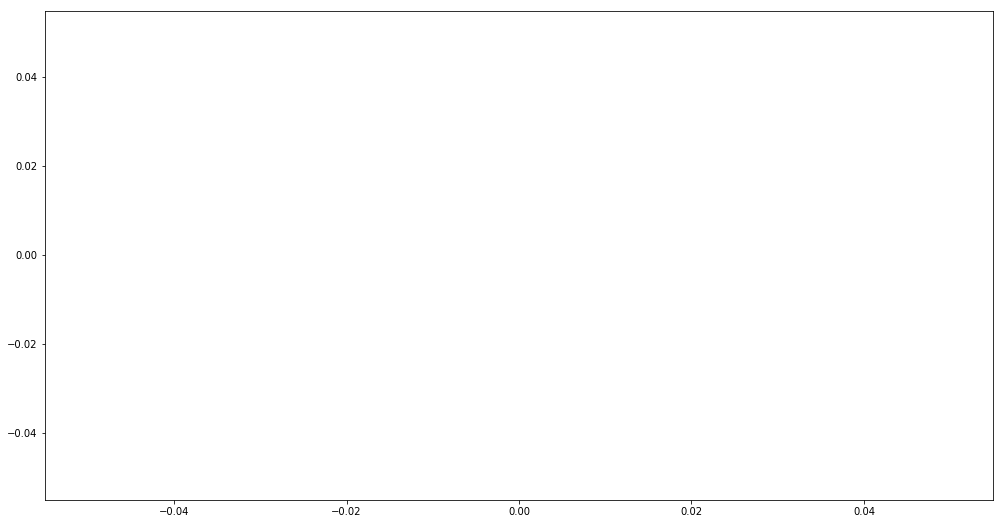

In [173]:
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot